In [12]:
# Cancer Dataset

Data Dictionary

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)
avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)
avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)
incidenceRate: Mean per capita (100,000) cancer diagoses(a)
medianIncome: Median income per county (b)
popEst2015: Population of county (b)
povertyPercent: Percent of populace in poverty (b)
studyPerCap: Per capita number of cancer-related clinical trials per county (a)
binnedInc: Median income per capita binned by decile (b)
MedianAge: Median age of county residents (b)
MedianAgeMale: Median age of male county residents (b)
MedianAgeFemale: Median age of female county residents (b)
Geography: County name (b)
AvgHouseholdSize: Mean household size of county (b)
PercentMarried: Percent of county residents who are married (b)
PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)
PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)
PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)
PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)
PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)
PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)
PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)
PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)
PctPrivateCoverage: Percent of county residents with private health coverage (b)
PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)
PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)
PctPublicCoverage: Percent of county residents with government-provided health coverage (b)
PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)
PctWhite: Percent of county residents who identify as White (b)
PctBlack: Percent of county residents who identify as Black (b)
PctAsian: Percent of county residents who identify as Asian (b)
PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)
PctMarriedHouseholds: Percent of married households (b)
BirthRate: Number of live births relative to number of women in county (b)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
data = pd.read_csv('./cancer.csv', encoding='latin-1')

In [55]:
data.head()
data.isnull().sum()
data["PctSomeCol18_24"] = data["PctSomeCol18_24"].fillna(data["PctSomeCol18_24"].mean())
data["PctEmployed16_Over"] = data["PctEmployed16_Over"].fillna(data["PctEmployed16_Over"].mean())
data["PctPrivateCoverageAlone"] = data["PctPrivateCoverageAlone"].fillna(data["PctPrivateCoverageAlone"].mean())

In [56]:
X = data.drop('TARGET_deathRate', axis=1)
# ignore binnedInc, Geography, and PctSomeCollege
X = X.drop('binnedInc', axis=1)
X = X.drop('Geography', axis=1).values
Y = data['TARGET_deathRate'].values

In [57]:
X = np.c_[np.ones(X.shape[0]), X]
# X.describe()

Calculating the value of B=(XT⋅X)^−1⋅XT⋅y


In [59]:
# B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [60]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
B

array([ 1.62109733e+02, -3.23895512e-03,  1.80232750e-02,  1.92488319e-01,
        1.10465355e-04, -1.59053418e-05,  3.66118820e-01,  7.52300311e-05,
       -2.45288409e-03, -4.62107008e-01, -1.31707405e-01,  7.38169575e-01,
        1.30298165e+00, -1.30792540e-01,  2.24971641e-01,  4.19873802e-02,
       -7.65095076e-02,  4.08468050e-01, -1.18170230e+00, -5.34974855e-01,
        1.22954127e-01, -5.04421630e-01,  5.99309471e-02,  3.52188343e-01,
       -2.62456356e-01,  3.46114341e-01, -1.36091721e-01, -5.32860752e-02,
       -4.73182560e-02, -8.93384151e-01, -1.30589690e+00, -8.78086309e-01])

In [61]:
Y_pred = X @ B
Y_pred


array([171.29671661, 156.59613025, 151.62848211, ..., 170.4564015 ,
       170.04628354, 176.57233958])

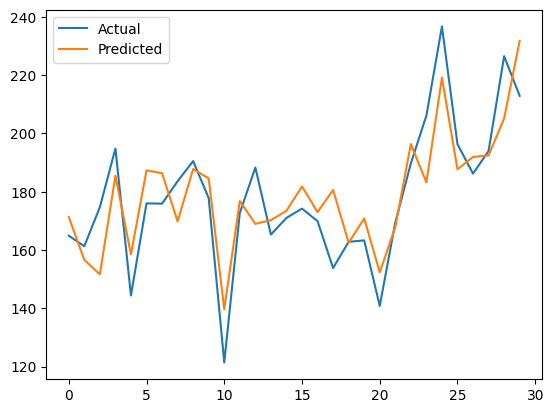

In [62]:
plt.plot(Y[:30], label='Actual')
plt.plot(Y_pred[:30], label='Predicted')
plt.legend()

plt.show()

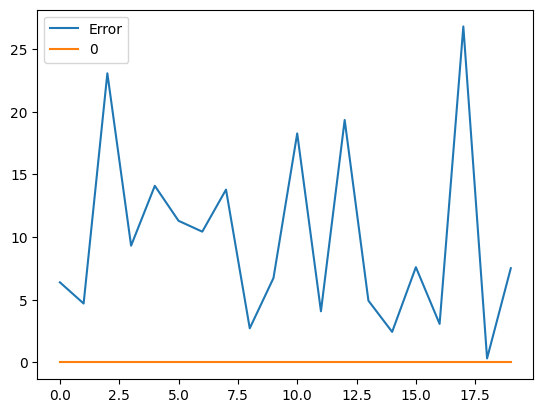

In [63]:
# Show graph per error
plt.plot(((Y - Y_pred)[:20] ** 2) ** 0.5, label='Error')
plt.plot([0] * 20, label='0')
plt.legend()
plt.show()
